In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline

In [39]:
import numpy as np
import pandas as pd
import cv2
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from keras.layers import MaxPooling2D,Dropout

In [ ]:
# seaborn,os,glob,numpy,tensorflow,[keras.layers - Conv2D , Dense ,Flatten,MaxPool2D] ,keras.models.Sequential,matplotlib

In [3]:
import os
import glob as gb

base_path = ''

train_path = os.path.join(base_path, 'dataset')

folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    if folder == ".DS_Store":
        continue
    folder_path = os.path.join(train_path, folder)
    
    files = gb.glob(os.path.join(folder_path, '*.png'))
    
    print(f"For training data, found {len(files)} in folder {folder}")

For training data, found 1014 in folder Control-Sagittal
For training data, found 1002 in folder Control-Axial
For training data, found 761 in folder MS-Sagittal
For training data, found 650 in folder MS-Axial


In [7]:
size = []
for folder in folders:
    
    folder_path = os.path.join(train_path, folder)
    
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
        
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(719, 1493, 4)       2
(618, 758, 4)        2
(687, 912, 4)        1
(606, 722, 4)        1
(515, 450, 4)        1
(543, 487, 4)        1
Name: count, dtype: int64

In [10]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [11]:
s = 100
x_train= []
y_train= []

for folder in folders:
    
    folder_path = os.path.join(train_path, folder)
    
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])

In [12]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


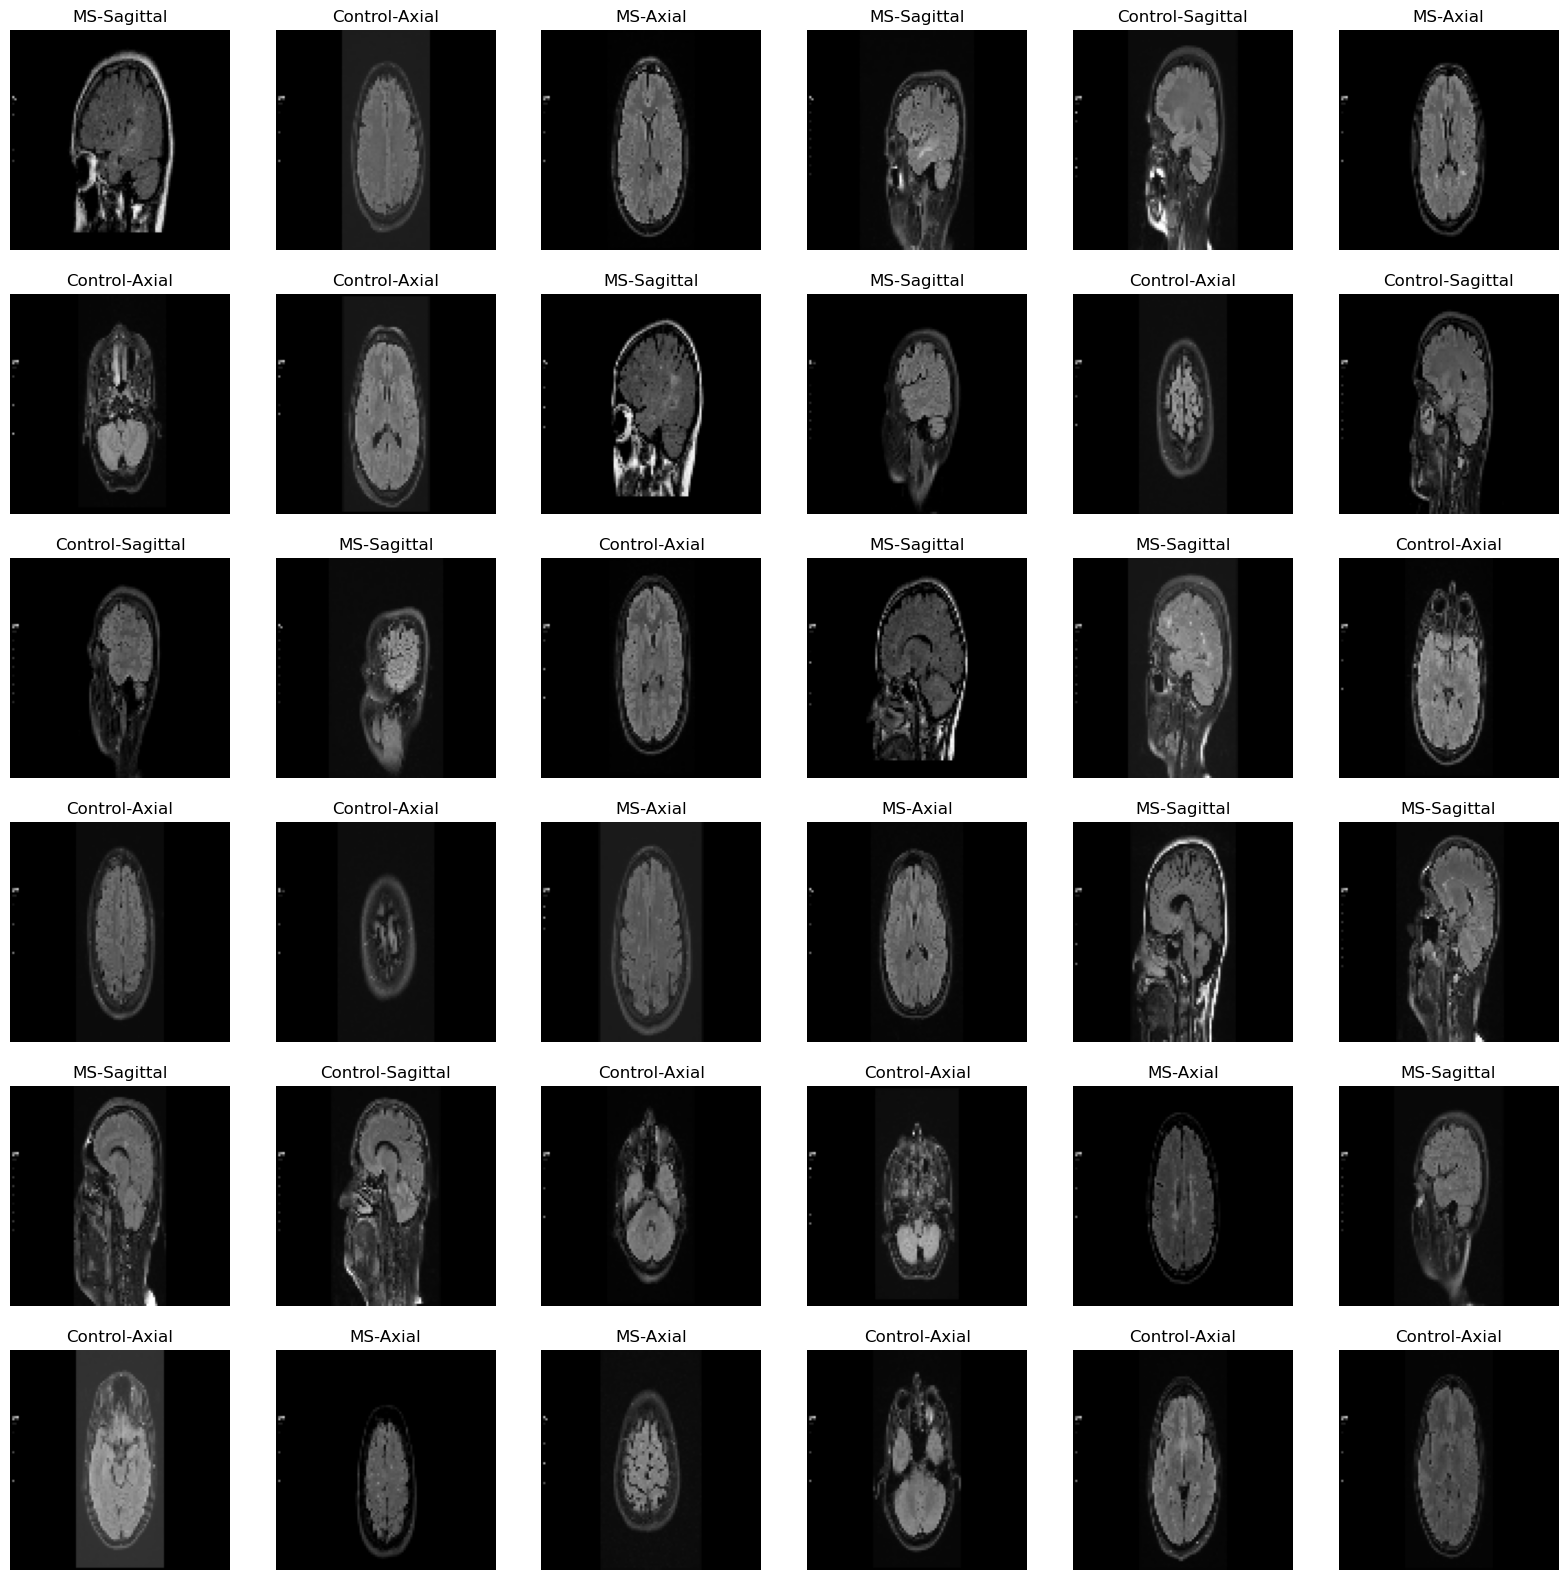

In [13]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [14]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 100, 100, 3)
y_train shape is (3427,)


In [15]:
for i = 1:size(input_image, 1) - 2 
    for j = 1:size(input_image, 2) - 2 
  
        % Gradient approximations 
        Gx = sum(sum(Mx.*input_image(i:i+2, j:j+2))); 
        Gy = sum(sum(My.*input_image(i:i+2, j:j+2))); 
                 
        % Calculate magnitude of vector 
        filtered_image(i+1, j+1) = sqrt(Gx.^2 + Gy.^2); 
         
    end
end
  
% Displaying Filtered Image 
filtered_image = uint8(filtered_image); 
figure, imshow(filtered_image); title('Filtered Image'); 
  
% Define a threshold value 
thresholdValue = 100; % varies between [0 255] 
output_image = max(filtered_image, thresholdValue); 
output_image(output_image == round(thresholdValue)) = 0; 
  
% Displaying Output Image 
output_image = im2bw(output_image); 
figure, imshow(output_image); title('Edge Detected Image');

58889256/58889256 [==============================] - 6s 0us/step
Epoch 1/30
86/86 [==============================] - 48s 558ms/step - loss: 1.0294 - accuracy: 0.5144 - val_loss: 0.7313 - val_accuracy: 0.6589
Epoch 2/30
86/86 [==============================] - 48s 562ms/step - loss: 0.7280 - accuracy: 0.6392 - val_loss: 0.6200 - val_accuracy: 0.7405
Epoch 3/30
86/86 [==============================] - 49s 567ms/step - loss: 0.6446 - accuracy: 0.6702 - val_loss: 0.5588 - val_accuracy: 0.7609
Epoch 4/30
86/86 [==============================] - 49s 569ms/step - loss: 0.6124 - accuracy: 0.6910 - val_loss: 0.5266 - val_accuracy: 0.7551
Epoch 5/30
86/86 [==============================] - 48s 560ms/step - loss: 0.5858 - accuracy: 0.7008 - val_loss: 0.5026 - val_accuracy: 0.7843
Epoch 6/30
86/86 [==============================] - 49s 572ms/step - loss: 0.5680 - accuracy: 0.7121 - val_loss: 0.5049 - val_accuracy: 0.7580
Epoch 7/30
86/86 [==============================] - 48s 561ms/step - loss: 0.

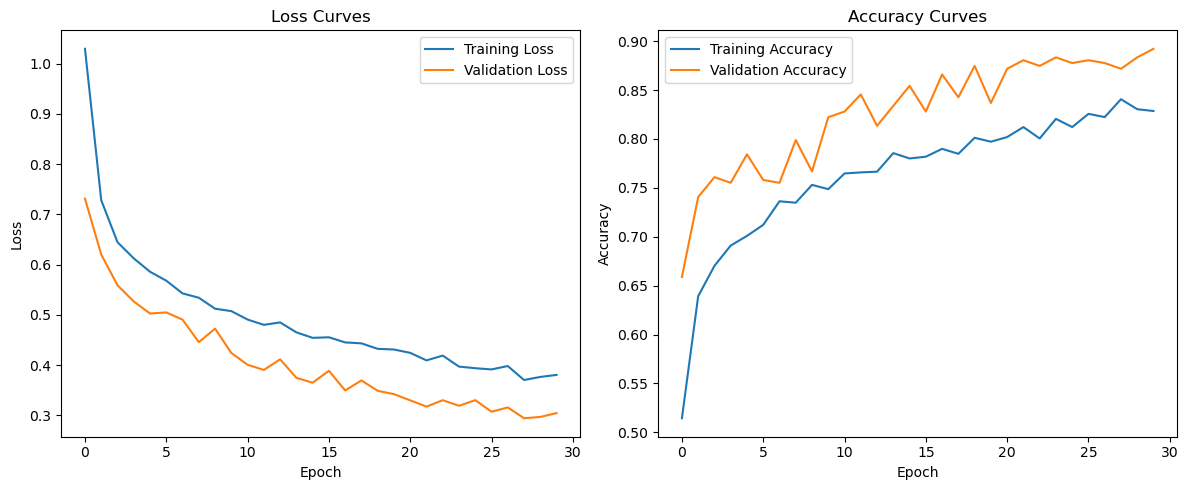

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt

Mat grad_x, grad_y;
Mat abs_grad_x, abs_grad_y;
Sobel(src_gray, grad_x, ddepth, 1, 0, ksize, scale, delta, BORDER_DEFAULT);
Sobel(src_gray, grad_y, ddepth, 0, 1, ksize, scale, delta, BORDER_DEFAULT);

# Split the data into training and validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Number of classes
num_classes = 4  # Change this to the number of classes in your dataset

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(s, s, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
    
# Add custom layers for your classification task
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with the number of classes

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

# Step 5: Training
history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()

In [21]:
y_test

array([3, 3, 1, 2, 1, 0, 3, 3, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 3, 3, 1, 1,
       3, 2, 1, 3, 0, 1, 0, 1, 1, 3, 3, 2, 1, 1, 3, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 1, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 1, 2, 0, 3, 0, 0, 3, 3,
       0, 1, 0, 1, 1, 1, 1, 3, 0, 3, 0, 3, 2, 0, 3, 3, 1, 1, 3, 0, 1, 2,
       2, 3, 0, 3, 1, 3, 0, 1, 1, 2, 0, 0, 1, 0, 3, 0, 2, 3, 1, 0, 2, 1,
       1, 3, 3, 0, 0, 1, 1, 3, 3, 0, 0, 2, 1, 1, 1, 0, 2, 1, 3, 0, 1, 3,
       2, 0, 3, 1, 3, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 1, 3, 1, 0,
       3, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 2, 3, 2, 1,
       1, 0, 2, 3, 3, 3, 2, 1, 3, 0, 1, 1, 1, 3, 1, 0, 3, 3, 2, 0, 2, 0,
       0, 2, 0, 1, 2, 0, 3, 0, 0, 2, 3, 1, 3, 2, 2, 1, 0, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 3, 3,
       2, 1, 1, 0, 3, 0, 3, 0, 3, 3, 1, 1, 3, 0, 1, 3, 0, 3, 3, 0, 0, 1,
       2, 0, 1, 3, 2, 2, 1, 1, 1, 1, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 2,
       3, 2, 0, 3, 1, 0, 0, 2, 3, 2, 0, 3, 0, 2, 2,

In [22]:
true_labels = y_test 

predicted_probabilities = model.predict(x_test)

predicted_labels = np.argmax(predicted_probabilities, axis=1)

11/11 [==============================] - 6s 503ms/step


In [23]:
predicted_labels

array([3, 3, 1, 2, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 3, 1, 1, 1,
       3, 2, 1, 3, 0, 1, 0, 1, 1, 3, 3, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 3, 0, 1, 1, 1, 3, 2, 2, 1, 1, 1, 2, 0, 3, 0, 0, 3, 3,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 3, 1, 1, 3, 3, 0, 1, 0,
       3, 3, 0, 3, 1, 3, 0, 1, 1, 2, 0, 0, 1, 0, 3, 0, 0, 3, 1, 0, 2, 1,
       1, 3, 1, 0, 0, 1, 1, 3, 3, 0, 2, 0, 1, 1, 1, 0, 2, 1, 3, 0, 1, 3,
       2, 0, 3, 1, 3, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 3, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 0, 2, 3, 3, 3, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 3, 1, 3, 2, 2, 1, 0, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 3, 3,
       2, 1, 1, 0, 3, 0, 1, 2, 1, 1, 1, 1, 3, 0, 1, 3, 0, 1, 3, 0, 0, 1,
       2, 0, 1, 3, 2, 0, 1, 1, 1, 1, 0, 1, 3, 0, 3, 0, 0, 0, 0, 1, 0, 0,
       3, 2, 0, 1, 1, 0, 0, 2, 3, 2, 0, 3, 0, 0, 0,

In [25]:
report = classification_report(true_labels, predicted_labels, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.84      0.95      0.89       103
     Class 1       0.77      0.98      0.86       104
     Class 2       0.88      0.64      0.74        56
     Class 3       0.94      0.62      0.75        80

    accuracy                           0.83       343
   macro avg       0.86      0.80      0.81       343
weighted avg       0.85      0.83      0.83       343



In [27]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

Weighted Precision: 0.8492
Weighted Recall: 0.8338
Weighted F1-score: 0.8262


In [30]:
good = []
bad = []
for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
        good.append(true_labels[i])
    else:
        bad.append(true_labels[i])


In [33]:
print(len(good), len(bad))

286 57


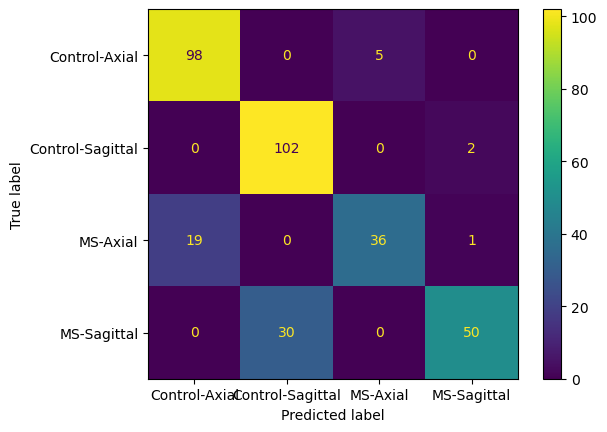

In [38]:
confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Control-Axial','Control-Sagittal','MS-Axial','MS-Sagittal'])

cm_display.plot()
plt.show()

In [40]:
from tensorflow.keras.models import load_model
model.save("VGG16.h5")

/Users/karanpreetsingh/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
